# Hysteresis
### Lehner White

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import newton

## Problem 1

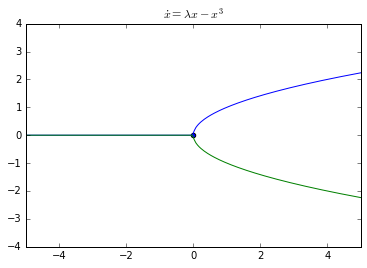

In [2]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton✬s method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
# Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    return -x**3 + x*lmbda

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), F)
plt.plot(C1,X1)
plt.plot(C2,X2)
plt.scatter(0,0)
plt.xlim(-5,5)
plt.ylim(-4,4)
plt.title(r'$\dot{x} = \lambda x - x^3$')
plt.show()

## Problem 2

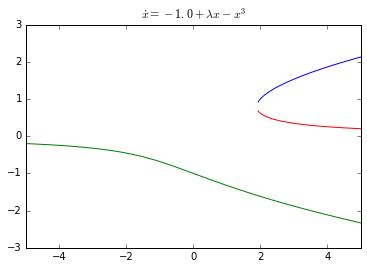

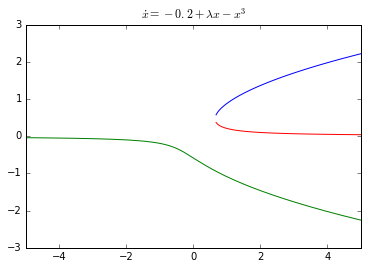

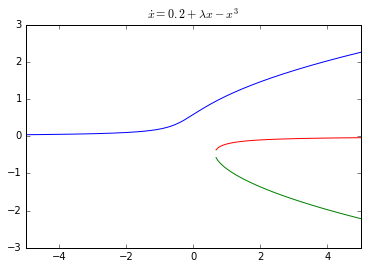

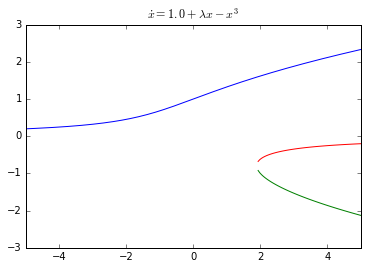

In [3]:
def F(x, lmbda):
    return -x**3 + x*lmbda + eta

eta_list = [-1.,-.2, .2, 1.]
for eta in eta_list:
    C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), F)
    C2, X2 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), F)
    C3, X3 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F)
    plt.title(r'$\dot{x} = %s + \lambda x - x^3$' % eta)
    plt.plot(C1,X1)
    plt.plot(C2,X2)
    plt.plot(C3,X3)
    plt.xlim(-5,5)
    plt.show()

## Problem 3

/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/Lehner/anaconda/lib/python2.7/site-packages/scipy/optimize/zeros.py:173: RuntimeWarning: Tolerance of 0.000101558596675 reached
  warnings.warn(msg, RuntimeWarning)


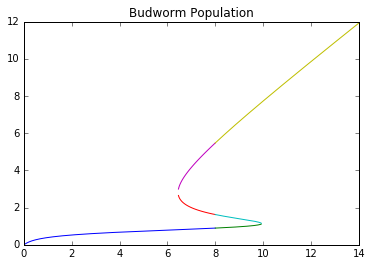

In [4]:
def F(x, k):
    return r*x*(1 - x/k) - (x**2 / (1 + x**2))

r = 0.56

k_list = [.898, 1.627, 5.475]

for k in k_list:
    C1, X1 = EmbeddingAlg(np.linspace(8, 0, 500), k, F)
    C2, X2 = EmbeddingAlg(np.linspace(8, 14, 500), k, F)
    plt.plot(C1, X1)
    plt.plot(C2, X2)
plt.title('Budworm Population')
plt.show()